In [1]:
import seaborn as sns
import pandas as pd

pd.set_option('display.max_column', None)
#pd.set_option('display.max_rows', None)
#pd.set_option('display.max_seq_items', None)
#pd.set_option('display.max_colwidth', 500)
#pd.set_option('expand_frame_repr', True)

titanic = sns.load_dataset('titanic')

In [2]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [3]:
# sibsp: number of siblings or spouse of a person; 0-8 possible
# parch: number of parents or children each passenger; 0-9 possible
# Fare: price paid for ticket
# Embark town: place where passenger got on boat

In [4]:
titanic.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# 1. A tragedy
## Age survived vs. died

In [11]:
# using loc
age_survived = titanic.loc[titanic['survived'] == 1, 'age'].mean()
age_died = titanic.loc[titanic['survived'] == 0, 'age'].mean()
print(f"Mean age of ppl survived: {age_survived:.2f}\nMean age of ppl died: {age_died:.2f}\nDifference in age of these groups: {age_survived-age_died:.2f}")

# using groupby
titanic.groupby('survived')['age'].mean()

Mean age of ppl survived: 28.34
Mean age of ppl died: 30.63
Difference in age of these groups: -2.28


survived
0    30.626179
1    28.343690
Name: age, dtype: float64

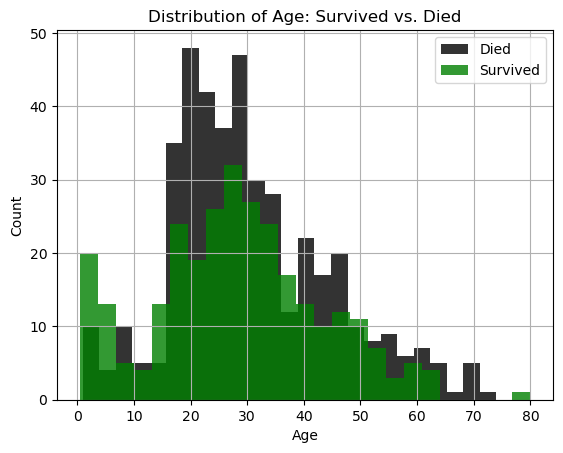

In [20]:
import matplotlib.pyplot as plt

# Histo
titanic[titanic['survived'] == 0]['age'].hist(alpha=0.8, label='Died', bins=25, color='black')
titanic[titanic['survived'] == 1]['age'].hist(alpha=0.8, label='Survived', bins=25, color='green')
plt.legend()
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Distribution of Age: Survived vs. Died')
plt.show()

# 2. The price of life
## Does the amount one paid for the trip correlate with survival rate?

In [41]:
fare_by_survival = titanic.groupby("survived")["fare"].mean()
print(fare_by_survival)

survived
0    22.117887
1    48.395408
Name: fare, dtype: float64


In [51]:
# Inflation adaption via Consumer Price Index (CPI)
cpi_1912 = 9.8
cpi_today = 130.9
print(f"Consumer price index correction (inflation 1912 until now) by a factor of: {cpi_today/cpi_1912:.4f}.")

fare_1912 = [fare_by_survival[0], fare_by_survival[1]]
fare_today = [fare * (cpi_today / cpi_1912) for fare in fare_1912]

# get current exchange rate
import yfinance as yf
# Instance API
ticker = yf.Ticker("GBPEUR=X")

exhange_rate = ticker.history(period='1d')['Close'].iloc[-1]
print(f"Current exchange rate: {exhange_rate:.4f} GBP/EUR.")

fare_today_euro = [fare * exhange_rate for fare in fare_today]
print(f"\nPeople that survived paid an avgerage ticket price of {fare_today_euro[1]:.2f}€.")
print(f"People that died paid an avgerage ticket price of {fare_today_euro[0]:.2f}€.")

Consumer price index correction (inflation 1912 until now) by a factor of: 13.3571.
Current exchange rate: 1.1943 GBP/EUR.

People that survived paid a avgerage ticket price of 772.02€.
People that died paid a avgerage ticket price of 352.83€.


### Did the ones who paid the most increased there changes to survive?

In [64]:
# 75. percentile (top quantile) of fare
top_quantile_fare = titanic['fare'].quantile(0.75)
print(f"The top quantile of fare tickets was: {top_quantile_fare:.2f} Pounds")

# Persons in top quantile
top_quantile_passengers = titanic[titanic['fare'] >= top_quantile_fare]

# Amount of ppl survived in top quantile
top_quantile_survived = top_quantile_passengers[top_quantile_passengers['survived'] == 1].shape[0]

# Total ppl top quantile
top_quantile_total = top_quantile_passengers.shape[0]

survival_rate_top = (top_quantile_survived / top_quantile_total) * 100
print(f"In the top quantile {top_quantile_survived} people survived from total of {top_quantile_total}.")
print(f"Survival rate top quantile: {survival_rate_top:.1f}%")
print(f"Every {int(top_quantile_total / top_quantile_survived)}th survived")

The top quantile of fare tickets was: 31.00 Pounds
In the top quantile 131 people survived from total of 225.
Survival rate top quantile: 58.2%
Every 1th survived


In [63]:
# 25. percentile (top quantile) of fare
bottom_quantile_fare = titanic['fare'].quantile(0.25)
print(f"The bottom quantile of fare tickets was: {bottom_quantile_fare:.2f} Pounds")

# Persons in top quantile
bottom_quantile_passengers = titanic[titanic['fare'] <= bottom_quantile_fare]

# Amount of ppl survived in top quantile
bottom_quantile_survived = bottom_quantile_passengers[bottom_quantile_passengers['survived'] == 1].shape[0]

# Total ppl top quantile
bottom_quantile_total = bottom_quantile_passengers.shape[0]

survival_rate_bottom = (bottom_quantile_survived / bottom_quantile_total) * 100
print(f"In the bottom quantile {bottom_quantile_survived} people survived from total of {bottom_quantile_total}.")
print(f"Survival rate bottom quantile: {survival_rate_bottom:.1f}%")
print(f"Every {int(bottom_quantile_total / bottom_quantile_survived)}th survived")

The bottom quantile of fare tickets was: 7.91 Pounds
In the bottom quantile 44 people survived from total of 223.
Survival rate bottom quantile: 19.7%
Every 5th survived


# What one can do with pandas

In [67]:
# unique classes
unique_classes = titanic['pclass'].unique()
unique_classes

array([3, 1, 2])

In [69]:
# age distribution
titanic['age'].value_counts()

age
24.00    30
22.00    27
18.00    26
19.00    25
28.00    25
         ..
36.50     1
55.50     1
0.92      1
23.50     1
74.00     1
Name: count, Length: 88, dtype: int64


## filter and select

In [ ]:
# woman first class
woman_in_first_class = titanic[titanic['pclass'] == 1 & (titanic['sex'] == 'female')]
woman_in_first_class[['fare', 'deck']]

,fare,deck
1,71.2833,C
3,53.1000,C
11,26.5500,C
31,146.5208,B
52,76.7292,D
...,...,...
856,164.8667,NaN
862,25.9292,D
871,52.5542,D
879,83.1583,C


In [81]:
# passengers with fare tickets above 50 pounds
high_fare_passengers = titanic[titanic['fare'] > 50]
high_fare_passengers

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
27,0,1,male,19.0,3,2,263.0000,S,First,man,True,C,Southampton,no,False
31,1,1,female,NaN,1,0,146.5208,C,First,woman,False,B,Cherbourg,yes,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
856,1,1,female,45.0,1,1,164.8667,S,First,woman,False,NaN,Southampton,yes,False
863,0,3,female,NaN,8,2,69.5500,S,Third,woman,False,NaN,Southampton,no,False
867,0,1,male,31.0,0,0,50.4958,S,First,man,True,A,Southampton,no,True
871,1,1,female,47.0,1,1,52.5542,S,First,woman,False,D,Southampton,yes,False


## Groups and aggregation

In [82]:
# average age of survivors and non-survivors
age_by_survival = titanic.groupby('survived')['age'].mean()
age_by_survival

survived
0    30.626179
1    28.343690
Name: age, dtype: float64

In [83]:
# average fare by class
fare_by_class = titanic.groupby('pclass')['fare'].mean()
fare_by_class

pclass
1    84.154687
2    20.662183
3    13.675550
Name: fare, dtype: float64

In [84]:
# amount of passengers by gender and survival status
gender_survival_counts = titanic.groupby(['sex', 'survived']).size()
gender_survival_counts

sex     survived
female  0            81
        1           233
male    0           468
        1           109
dtype: int64

## create new cols

In [88]:
titanic['age_group'] = pd.cut(titanic['age'], bins = [0, 12, 18, 60, 100], labels=['Children', 'Teen', 'Adult', 'Senior'])
print(titanic[['age', 'age_group']].head(10))

    age age_group
0  22.0     Adult
1  38.0     Adult
2  26.0     Adult
3  35.0     Adult
4  35.0     Adult
5   NaN       NaN
6  54.0     Adult
7   2.0  Children
8  27.0     Adult
9  14.0      Teen


In [89]:
# ratio of ticket price to family
titanic['family_size'] = titanic['sibsp'] + titanic['parch'] + 1 # + 1 for person itself
titanic['fare_per_person'] = titanic['fare'] / titanic['family_size']
titanic[['fare', 'family_size', 'fare_per_person']].head()

,fare,family_size,fare_per_person
0,7.2500,2,3.62500
1,71.2833,2,35.64165
2,7.9250,1,7.92500
3,53.1000,2,26.55000
4,8.0500,1,8.05000


## Advanced filters and transformations

In [90]:
# passengers with missing age
missing_age = titanic[titanic['age'].isnull()]
missing_age

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,age_group,family_size,fare_per_person
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True,NaN,1,8.458300
17,1,2,male,NaN,0,0,13.0000,S,Second,man,True,NaN,Southampton,yes,True,NaN,1,13.000000
19,1,3,female,NaN,0,0,7.2250,C,Third,woman,False,NaN,Cherbourg,yes,True,NaN,1,7.225000
26,0,3,male,NaN,0,0,7.2250,C,Third,man,True,NaN,Cherbourg,no,True,NaN,1,7.225000
28,1,3,female,NaN,0,0,7.8792,Q,Third,woman,False,NaN,Queenstown,yes,True,NaN,1,7.879200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
859,0,3,male,NaN,0,0,7.2292,C,Third,man,True,NaN,Cherbourg,no,True,NaN,1,7.229200
863,0,3,female,NaN,8,2,69.5500,S,Third,woman,False,NaN,Southampton,no,False,NaN,11,6.322727
868,0,3,male,NaN,0,0,9.5000,S,Third,man,True,NaN,Southampton,no,True,NaN,1,9.500000
878,0,3,male,NaN,0,0,7.8958,S,Third,man,True,NaN,Southampton,no,True,NaN,1,7.895800


In [91]:
# transform age in numeric values
titanic['sex_numeric'] = titanic['sex'].map({'male': 0, 'female': 1})
titanic[['sex', 'sex_numeric']].head()

,sex,sex_numeric
0,male,0
1,female,1
2,female,1
3,female,1
4,male,0


In [94]:
# normalized fare prices (scale of 0 - 1)
titanic['fare_normalized'] = (titanic['fare'] - titanic['fare'].min()) / (titanic['fare'].max() - titanic['fare'].min())
titanic[['fare','fare_normalized']].head()

,fare,fare_normalized
0,7.2500,0.014151
1,71.2833,0.139136
2,7.9250,0.015469
3,53.1000,0.103644
4,8.0500,0.015713


## Visualization

In [126]:
import matplotlib.pyplot as plt
#print(plt.style.available)
plt.style.use('fivethirtyeight')
plt.rcParams.update({"figure.facecolor": "grey", "axes.facecolor": "gray"}) 

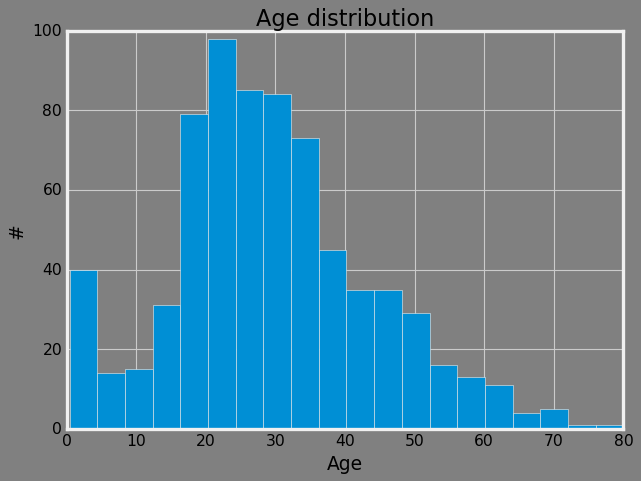

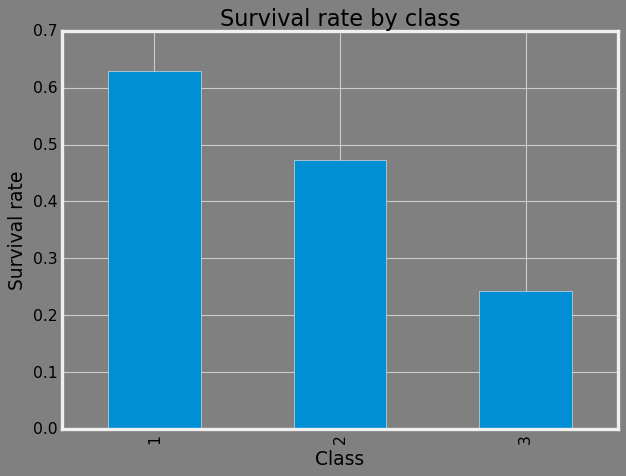

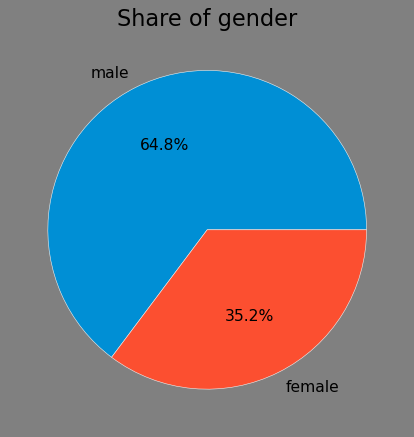

In [127]:
titanic['age'].hist(bins=20)
plt.title("Age distribution")
plt.xlabel("Age")
plt.ylabel("#")
plt.show()

# 2. Überlebensrate nach Klasse
titanic.groupby('pclass')['survived'].mean().plot(kind='bar')
plt.title("Survival rate by class")
plt.xlabel("Class")
plt.ylabel("Survival rate")
plt.show()

# 3. Anzahl der Passagiere pro Geschlecht
titanic['sex'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title("Share of gender")
plt.ylabel("")  # Entferne die Y-Achse
plt.show()

## Export

In [128]:
# parquet export
titanic.to_parquet('./titanic_added_cols.parquet', engine='pyarrow', index=False)

In [ ]:
!git clone 